# Day 2 - Self-Paced Practice: Designing a Real-Time Chat Application

**Objective:** Reinforce the concept of diagram-as-code by generating architectural diagrams for a new problem domain.

**Estimated Time:** 45 minutes

**Introduction:**
A key skill for a modern architect is the ability to quickly visualize and communicate system design. In this lab, you will practice using an LLM to generate two different types of diagrams for a common software system: a real-time chat application. This will help you become more fluent in prompting for and interpreting diagrams-as-code.

## 1. Setup

We'll begin by setting up our environment, importing the necessary utilities and initializing our LLM client.

In [1]:
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_completion, render_plantuml_diagram, save_artifact, clean_llm_output, render_mermaid_diagram

# For design tasks, models with strong reasoning are recommended.
client, model_name, api_provider = setup_llm_client(model_name="gpt-4o")

✅ LLM Client configured: Using 'openai' with model 'gpt-4o'


## 2. The Problem Statement

Your task is to design the high-level architecture for a simple, real-time chat application. 

**Core Components & Flow:**
1.  A **Frontend** (web browser) where users interact.
2.  A **Backend API Server** to handle user authentication and message history.
3.  A **WebSocket Server** to handle real-time message broadcasting.
4.  A **Database** to store user information and chat messages.

### ⭐ Deeper Dive: The Power of "Diagrams as Code"

The technique you're using in this lab—generating PlantUML or Mermaid code from a prompt—is a form of **"Diagrams as Code."** This is a powerful, modern practice with several key advantages over using traditional drag-and-drop GUI tools:

- **Version Controllable:** Since the diagram is just a text file, you can check it into Git, review changes in pull requests, and track its history alongside your application code.
- **Easily Editable:** Modifying a relationship or adding a component is as simple as changing a line of text. This is often much faster than fiddling with boxes and arrows in a GUI.
- **Consistent:** Templates and code generation ensure that all diagrams across your organization can share a consistent style and level of detail.
- **Automatable:** Because it's text, you can build tools that automatically generate or update architecture diagrams as part of your CI/CD pipeline, ensuring your documentation never goes stale.

## 3. Your Tasks

### Task 1: Generate a Component Diagram

First, we'll create a **component diagram**. This type of diagram is excellent for showing the high-level static structure of a system and how the major pieces are connected.

#### 💡 Pro-Tip: Prompting for Structural Diagrams

When prompting an LLM to generate a structural diagram (like a Component, C4, or Class diagram), follow this pattern for the best results:

1.  **State the Format:** Begin by clearly stating you want `PlantUML code for a component diagram`.
2.  **Define the Components:** Explicitly list the key components or containers you want to see in the diagram. This gives the LLM the primary "actors."
3.  **Describe the Relationships:** Clearly describe the connections *between* the components. Use directional language like "Component A sends data to Component B via HTTPS."
4.  **Constrain the Output:** End by reminding the model to `"Output only the raw PlantUML code."`

--- Generating Component Diagram ---

--- Generated Mermaid Code ---
ermaid
%%{ init : { "theme" : "default" } }%%
flowchart TD
    Frontend[Frontend]
    BackendAPIServer[Backend API Server]
    WebSocketServer[WebSocket Server]
    Database[Database]

    Frontend -- HTTPS --> BackendAPIServer
    Frontend -- WebSocket --> WebSocketServer
    WebSocketServer -- HTTP --> BackendAPIServer
    BackendAPIServer -- SQL --> Database
✅ Diagram rendered and saved to: artifacts\abg.png


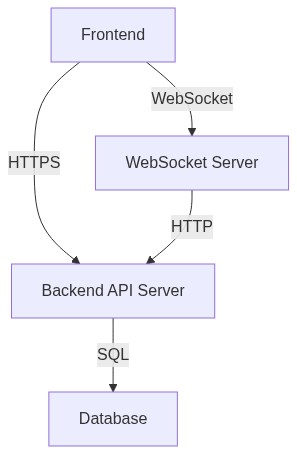

In [ ]:
# TODO: Write a prompt to generate a PlantUML component diagram.
# Follow the pro-tip above to structure your prompt.
component_diagram_prompt = """
You are an expert system architect. Generate Mermaid code for a component diagram that describes a real-time chat application.

The diagram should include the following four components:
- A 'Frontend' (e.g., a web browser)
- A 'Backend API Server'
- A 'WebSocket Server'
- A 'Database'

The relationships are as follows:
- The Frontend communicates with the Backend API Server over HTTPS for tasks like login and getting message history.
- The Frontend maintains a persistent WebSocket connection to the WebSocket Server for real-time messaging.
- The WebSocket Server sends new messages to the Backend API Server to be stored.
- The Backend API Server reads from and writes to the Database.

Output only the raw Mermaid code inside a markdown block.
"""

print("--- Generating Component Diagram ---")
component_puml_raw = get_completion(component_diagram_prompt, client, model_name, api_provider)
component_mermaid = clean_llm_output(component_puml_raw, language='plantuml')

print("\n--- Generated Mermaid Code ---")
print(component_mermaid)

# Render the diagram
if component_mermaid:
    # Double backslash to escape in the string
    render_mermaid_diagram(component_mermaid, "artifacts\\abg.png")

### Task 2: Generate a Sequence Diagram

Next, we'll create a **sequence diagram**. This type of diagram is used to model the interactions between objects in a sequential order — it shows *how* components collaborate to complete a task.

#### 💡 Pro-Tip: Prompting for Behavioral Diagrams

When prompting for a behavioral diagram (like a Sequence or Activity diagram), use a narrative style:

1.  **State the Format:** `Generate PlantUML code for a sequence diagram`.
2.  **Define the Participants:** List the actors or components involved in the interaction.
3.  **Tell a Story:** Describe the sequence of events step-by-step, as if you were narrating the process. Use phrases like `"First, User A does X. Then, System B sends a message to System C."`. This chronological description maps perfectly to the structure of a sequence diagram.

In [ ]:
# TODO: Write a prompt to generate a PlantUML sequence diagram.
# Use the narrative, storytelling approach from the pro-tip.
sequence_diagram_prompt = """
You are an expert system architect. Generate Mermaid code for a sequence diagram illustrating the process of one user sending a chat message and another user receiving it.

The participants in the diagram should be: 'User_A', 'Browser', 'Backend_API', 'WebSocket_Server', and 'User_B'.

The sequence of events is as follows:
1. First, User_A types a message into their Browser and clicks send.
2. The Browser sends the message to the WebSocket_Server over the active connection.
3. The WebSocket_Server immediately broadcasts this message to all other connected clients, including User_B's Browser.
4. User_B's Browser receives the message and displays it.
5. In parallel, the WebSocket_Server also sends the message to the Backend_API to be saved for history.
6. The Backend_API stores the message in the database.

Output only the raw Mermaid code inside a markdown block. Do not enclose in any markdown.
"""

print("--- Generating Sequence Diagram ---")
sequence_puml_raw = get_completion(sequence_diagram_prompt, client, model_name, api_provider)
sequence_puml = clean_llm_output(sequence_puml_raw, language='plantuml')

print("\n--- Generated Mermaid Code ---")
print(sequence_puml)

# Render the diagram
if sequence_puml:
    render_plantuml_diagram(sequence_puml, "artifacts/day2_sp_chat_app_sequence_diagram.png")

## Lab Conclusion

Great work! In this practice lab, you have reinforced your ability to use an LLM to generate different types of architectural diagrams from a text description. You created both a static component diagram showing the system's structure and a dynamic sequence diagram showing a key user interaction. This skill is invaluable for quickly communicating complex designs to your team.